&nbsp;

## 데이터 다운 및 데이터 확인

### 데이터 폴더 생성 및 이동

In [ ]:
%mkdir data

In [ ]:
%cd data

/content/data


&nbsp;

### 데이터 다운 [lg 데이터](https://drive.google.com/file/d/1kepvD1uQqhRBhkNb08r3rmocA2U3-3NF/view)

In [ ]:
import os
os.getcwd()

'/content/data'

In [ ]:
!gdown --id 1kepvD1uQqhRBhkNb08r3rmocA2U3-3NF

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1kepvD1uQqhRBhkNb08r3rmocA2U3-3NF
To: /content/data/dataset.zip
100% 212M/212M [00:01<00:00, 178MB/s]


- 압축풀기

In [ ]:
os.getcwd()

'/content/data'

In [ ]:
!unzip -qq  "/content/data/dataset.zip"

&nbsp;

### label_test.json 수정

In [ ]:
import json

with open("/content/data/dataset/label_test.json") as f:
  data_train = json.load(f)

data_train['categories'] = [{'id': 1, 'name': 'Normal'}]

print(data_train.keys())

with open('/content/data/dataset/test.json', 'w') as f:
    json.dump(data_train, f)

dict_keys(['images', 'categories'])


In [ ]:
with open("/content/data/dataset/label(polygon)_train.json") as f:
  poly_train = json.load(f)

poly_train.keys()

dict_keys(['images', 'annotations', 'categories'])

## coco_annotations_mask 시각화



### 지정된 이미지를 데이터 세트에서 로드하기

In [ ]:
# 데이터 폴더 설정
data_root = 'data/dataset/'
classes = ('Normal',)

# 데이터 설정
data = dict(
    samples_per_gpu=1,
    workers_per_gpu=0,
    train=dict(
      img_prefix=data_root + "train/",
      classes = classes,
      ann_file=data_root + "label(polygon)_train.json"
),
    val=dict(
        img_prefix=data_root + "train/",
        classes = classes,
        ann_file=data_root + "label(polygon)_train.json"
),
    test=dict(
        img_prefix=data_root + "test/",
        classes = classes,
        ann_file=data_root + "test.json"
)
)

In [ ]:
annFile = "/content/data/dataset/label(polygon)_train.json"
# annotation 파일을 COCO객체로 로드하면 다양한 COCO객체의 API들을 이용하여 COCO DATASET 활용 가능
from pycocotools.coco import COCO
# pycocotools를 쓰려면 제일먼저 객체를 만들어야 한다
coco=COCO(annFile)

loading annotations into memory...
Done (t=0.76s)
creating index...
index created!


In [ ]:
print(coco.getCatIds()) # 클래스는 노말 하나이므로 1, 하나만 나옴.

[1]


In [ ]:
cats = coco.loadCats(coco.getCatIds())
cats

[{'id': 1, 'name': 'Normal'}]

In [ ]:
catIds = coco.getCatIds(catNms=['Normal']);
print(catIds)
# oco.getImgIds(catIds=catIds)는 해당 catogory id별로 한개의 image id을 임의로 출력
imgIds = coco.getImgIds(catIds=catIds )
print(imgIds)

[1]
[1, 2, 3, 6, 7, 8, 9, 12, 13, 14, 18, 19, 22, 24, 25, 26, 27, 28, 29, 30, 33, 34, 35, 36, 41, 44, 45, 46, 47, 48, 49, 51, 53, 55, 56, 57, 58, 59, 60, 61, 62, 63, 65, 67, 68, 70, 71, 73, 74, 75, 77, 80, 84, 87, 88, 91, 92, 93, 97, 98, 99, 100, 102, 105, 106, 107, 108, 110, 113, 115, 116, 118, 119, 121, 127, 128, 129, 131, 132, 133, 137, 139, 141, 142, 145, 147, 149, 151, 153, 154, 155, 156, 157, 158, 159, 160, 162, 164, 167, 171, 174, 176, 178, 184, 186, 187, 188, 194, 196, 197, 198, 200, 201, 202, 206, 208, 209, 210, 213, 216, 217, 218, 219, 220, 225, 226, 228, 230, 231, 235, 238, 239, 241, 242, 245, 247, 249, 250, 252, 253, 256, 258, 259, 264, 266, 267, 270, 271, 272, 276, 277, 278, 279, 281, 282, 285, 288, 290, 292, 293, 295, 296, 298, 301, 303, 305, 306, 310, 313, 315, 317, 318, 320, 321, 322, 324, 325, 328, 330, 332, 334, 336, 338, 339, 344, 346, 348, 349, 351, 352, 353, 354, 357, 362, 363, 365, 366, 368, 373, 374, 375, 377, 381, 384, 385, 386, 391, 394, 395, 397, 401, 402, 403

In [ ]:
img = coco.loadImgs(1)
img

[{'id': 1, 'width': 1280, 'height': 1024, 'file_name': '0398.jpg'}]

In [ ]:
#loadImgs()는 인자로 들어온 image id에 대한 메타 정보를 딕셔너리를 개별 원소로 가지는 리스트로 반환
img = coco.loadImgs(977)
print(img)

# 전체 리스트는 필요 없고 내부 딕셔너리만 필요하므로 [0]으로 내부 딕셔너리 추출 
print("\n내부 딕셔너리 파일 메타정보 추출")
img = coco.loadImgs(977)[0]
print(img)

[{'id': 977, 'width': 1280, 'height': 1024, 'file_name': '0537.jpg'}]

내부 딕셔너리 파일 메타정보 추출
{'id': 977, 'width': 1280, 'height': 1024, 'file_name': '0537.jpg'}


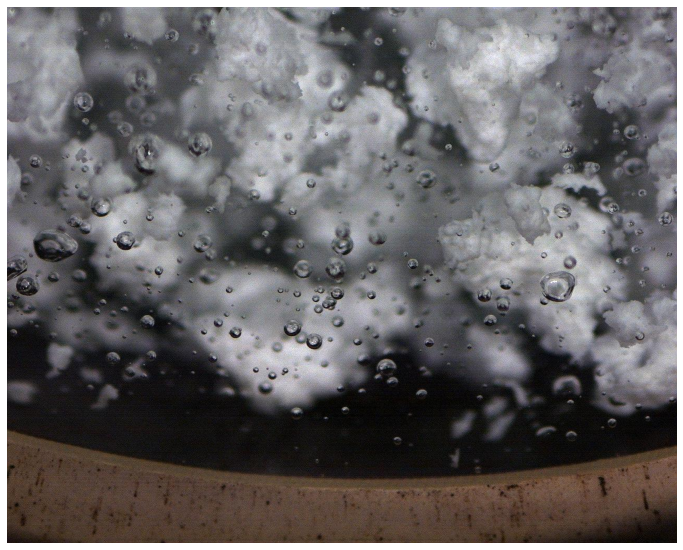

In [ ]:
import cv2
import matplotlib.pyplot as plt
import pylab
%matplotlib inline

file_path = '/content/data/dataset/train/' + img['file_name']

image_array = cv2.imread(file_path)
image_array = cv2.cvtColor(image_array, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 14))
plt.axis('off')
plt.imshow(image_array)
plt.show()

### Instance Segmentation 시각화 - COCO API 활용한 시각화
* getAnnIds()로 특정 image에 해당하는 annotation id를 가져온 후에 이 id를 loadAnns()로 입력하여 해당 이미지의 모든 annotation 정보를 가져옴. 
* segmentation 정보는 polygon 형태로 되어 있음. 
* annotation 정보를 coco.showAnns(anns)에 입력하여 instance segmentation 시각화 수행. 

In [ ]:
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
annIds

In [ ]:
anns = coco.loadAnns(annIds)
anns

ex)

{'id': 12924,

  'image_id': 977,

  'category_id': 1,

  'segmentation': [[32,
    715,
    41,
    716,
    43,
    716,
    47,
    720,
    53,
    725,
    58,
    730,
    57,
    736,
    54,
    737,
    46,
    739,
    46,
    748,
    44,
    754,
    39,
    756,
    30,
    755,
    21,
    754,
    14,
    752,
    11,
    748,
    7,
    743,
    4,
    740,
    3,
    734,
    2,
    729,
    2,
    721,
    3,
    718,
    4,
    717,
    17,
    714,
    20,
    714,
    27,
    715,
    32,
    715]],

  'area': 1815.0,

  'bbox': [2.0, 714.0, 56.0, 42.0],

  'iscrowd': 0},


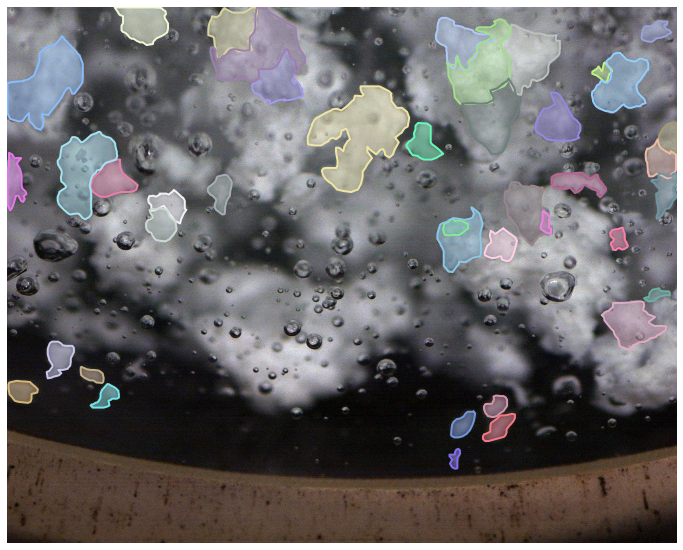

In [ ]:
# showAnns( )는 annotation 정보들을 입력 받아서 Visualization 시켜줌. 단 먼저 matplotlib 객체로 원본 이미지가 먼저 로드되어 있어야 함. 
plt.figure(figsize=(12, 14))
plt.imshow(image_array)
plt.axis('off')

coco.showAnns(anns)

### Polygon Annotation 정보를 이용하여 Instance Segmentation 시각화
* Polygon 정보를 직접 추출하여 이를 시각화
* polygon 정보를 coco API를 활용하여 masking 형태로 변환 후 해당 masking을 원본 이미지에 적용하여 시각화.  

In [ ]:
len(anns), type(anns[0])

(41, dict)

In [ ]:
# 앞에서 추출한 annotations 정보를 가지는 anns list의 의 3번째 값(인덱스 2)에서 segmentation polygon 값만 추출
print(anns[2]['segmentation'])
ann_2_seg = anns[2]['segmentation'][0]
print(type(ann_2_seg), len(ann_2_seg))
print(ann_2_seg)

# 좌표들은 xy xy xy xy xy..... 이렇게 한쌍식 어노테이션에 들어있음.


[[184, 709, 183, 716, 181, 718, 170, 717, 164, 713, 158, 713, 153, 711, 147, 708, 141, 703, 140, 696, 140, 689, 141, 687, 150, 691, 153, 692, 159, 693, 164, 693, 173, 694, 176, 695, 182, 700, 184, 709]]
<class 'list'> 40
[184, 709, 183, 716, 181, 718, 170, 717, 164, 713, 158, 713, 153, 711, 147, 708, 141, 703, 140, 696, 140, 689, 141, 687, 150, 691, 153, 692, 159, 693, 164, 693, 173, 694, 176, 695, 182, 700, 184, 709]


In [ ]:
 # x,y 좌표값이 연이어 되어 있는 list형 polygon segmentation 정보를 x,y 쌍 형태로 변환. 
 polygon_x = [x for index, x in enumerate(ann_2_seg) if index % 2 == 0] # 짝수인 인덱스 = x좌표
 polygon_y = [x for index, x in enumerate(ann_2_seg) if index % 2 == 1] # 홀수인 인덱스 = y좌표 
 print('polygon_x:', polygon_x)
 print('polygon_y:', polygon_y)
 polygon_xy = [[x, y] for x, y in zip(polygon_x, polygon_y)]
 print('polygon_xy:', polygon_xy) # xy좌표를 하나의 리스트로 묶어서 한쌍으로 만듬.

polygon_x: [184, 183, 181, 170, 164, 158, 153, 147, 141, 140, 140, 141, 150, 153, 159, 164, 173, 176, 182, 184]
polygon_y: [709, 716, 718, 717, 713, 713, 711, 708, 703, 696, 689, 687, 691, 692, 693, 693, 694, 695, 700, 709]
polygon_xy: [[184, 709], [183, 716], [181, 718], [170, 717], [164, 713], [158, 713], [153, 711], [147, 708], [141, 703], [140, 696], [140, 689], [141, 687], [150, 691], [153, 692], [159, 693], [164, 693], [173, 694], [176, 695], [182, 700], [184, 709]]


(-0.5, 1279.5, 1023.5, -0.5)

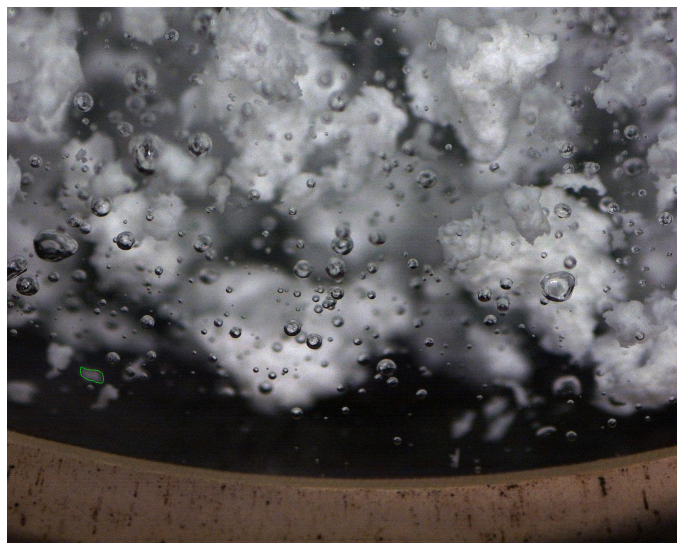

In [ ]:
import numpy as np

# opencv의 polylines를 이용하여 변환된 polygon 좌표 적용하여 instance segmentation 외곽선 시각화
green_color = (0, 255, 0)

draw_img = image_array.copy()
polygon_xy = np.array(polygon_xy, np.int32) # xy좌표가 들어있는 리스트들을  넘파이 배열로 변환해주기.
draw_img = cv2.polylines(draw_img, [polygon_xy], True, (0, 255, 0))

plt.figure(figsize=(12, 14))
plt.imshow(draw_img)
plt.axis('off')

(-0.5, 1279.5, 1023.5, -0.5)

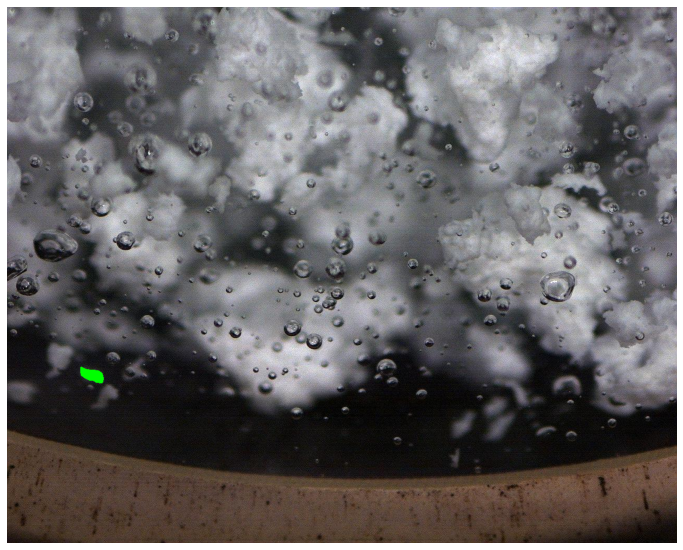

In [ ]:
# opencv의 fillPoly를 이용하여 변환된 polygon 좌표 적용하여 instance segmentation 내부 시각화
# cv2.polylines에선 겉의 라인만 그려줬다면 fillPoly를 이용하면 내부까지 채워서 그려준다.
green_color = (0, 255, 0)

draw_img = image_array.copy()
polygon_xy = np.array(polygon_xy, np.int32)
draw_img = cv2.fillPoly(draw_img, [polygon_xy], (0, 255, 0))

plt.figure(figsize=(12, 14))
plt.imshow(draw_img)
plt.axis('off')

In [ ]:
# coco api의 annToMask()를 이용하여 polygon을 mask 형태로 변환
mask = coco.annToMask(anns[2])
print('image shape:', image_array.shape, 'mask shape:', mask.shape)
print('0보다 큰 값이 있는 mask shape:', mask[mask > 0].shape, '0이 있는 mask shape:', mask[mask == 0].shape)
print(mask[mask > 0])

image shape: (1024, 1280, 3) mask shape: (1024, 1280)
0보다 큰 값이 있는 mask shape: (853,) 0이 있는 mask shape: (1309867,)
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

(-0.5, 1279.5, 1023.5, -0.5)

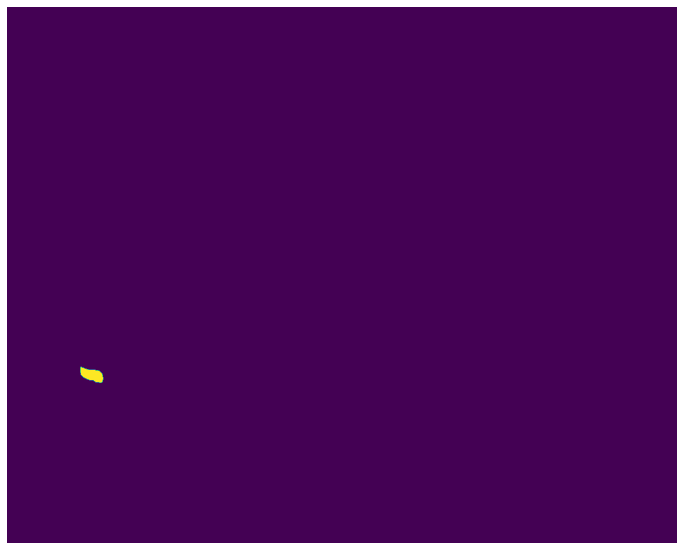

In [ ]:
plt.figure(figsize=(12, 14))
plt.imshow(mask)
plt.axis('off')

In [ ]:
def get_polygon_xy(ann_seg):
  polygon_x = [x for index, x in enumerate(ann_seg) if index % 2 == 0]
  polygon_y = [x for index, x in enumerate(ann_seg) if index % 2 == 1]
  polygon_xy = [[x, y] for x, y in zip(polygon_x, polygon_y)]
  polygon_xy = np.array(polygon_xy, np.int32)
  return polygon_xy

def get_mask(image_array_shape, polygon_xy):
  mask = np.zeros(image_array_shape)
  masked_polygon = cv2.fillPoly(mask, [polygon_xy], 1)
  
  return masked_polygon

def apply_mask(image, mask, color, alpha=0.5):
  for c in range(3):
    image[:, :, c] = np.where(mask == 1,
                              image[:, :, c] *
                              (1 - alpha) + alpha * color[c] * 255,
                              image[:, :, c])
  return image

# ann_seg_list에 있는 object들의 segmentation에 따라 instance segmentation 시각화. 
def draw_segment(image_array, ann_seg_list, color_list, alpha):
  draw_image = image_array.copy()
  mask_array_shape = draw_image.shape[0:2]

  # list형태로 입력된 segmentation 정보들을 각각 시각화
  for index, ann_seg in enumerate(ann_seg_list):
    # polygon 좌표로 변환. 
    polygon_xy = get_polygon_xy(ann_seg)
    # mask 정보 변환
    masked_polygon = get_mask(mask_array_shape, polygon_xy)

    # segmentation color와 외곽선용 color 선택 
    color_object = color_list[np.random.randint(len(color_list))]
    color_contour = color_list[np.random.randint(len(color_list))]
    # masking 적용. 
    masked_image = apply_mask(draw_image, masked_polygon, color_object, alpha=0.6)
    # 외곽선 적용. 
    s_mask_int = (masked_polygon*255).astype("uint8")
    contours, hierarchy = cv2.findContours(s_mask_int, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    masked_image = cv2.drawContours(masked_image, contours, -1, color_contour, 1, cv2.LINE_8, hierarchy, 100)

  return masked_image


In [ ]:
color_list = [
              (0, 255, 0),
              (255, 0, 0),
              (0, 0, 255)
]
anns = coco.loadAnns(annIds)
ann_seg_list = [ann['segmentation'][0] for ann in anns]
print(ann_seg_list)

[[32, 715, 41, 716, 43, 716, 47, 720, 53, 725, 58, 730, 57, 736, 54, 737, 46, 739, 46, 748, 44, 754, 39, 756, 30, 755, 21, 754, 14, 752, 11, 748, 7, 743, 4, 740, 3, 734, 2, 729, 2, 721, 3, 718, 4, 717, 17, 714, 20, 714, 27, 715, 32, 715], [101, 697, 103, 699, 99, 703, 96, 704, 88, 706, 86, 707, 83, 708, 77, 709, 75, 697, 80, 695, 86, 687, 86, 683, 85, 682, 80, 674, 77, 663, 77, 653, 79, 647, 81, 642, 85, 639, 92, 639, 97, 639, 102, 642, 106, 646, 112, 647, 117, 647, 124, 647, 127, 651, 127, 659, 121, 671, 121, 671, 121, 678, 120, 685, 117, 688, 115, 691, 106, 693, 105, 693, 97, 693, 101, 697], [184, 709, 183, 716, 181, 718, 170, 717, 164, 713, 158, 713, 153, 711, 147, 708, 141, 703, 140, 696, 140, 689, 141, 687, 150, 691, 153, 692, 159, 693, 164, 693, 173, 694, 176, 695, 182, 700, 184, 709], [207, 728, 212, 733, 212, 734, 213, 740, 213, 746, 209, 748, 200, 748, 198, 750, 193, 752, 194, 756, 195, 761, 191, 763, 184, 765, 179, 765, 173, 765, 165, 765, 163, 765, 159, 761, 161, 759, 164, 7

(-0.5, 1279.5, 1023.5, -0.5)

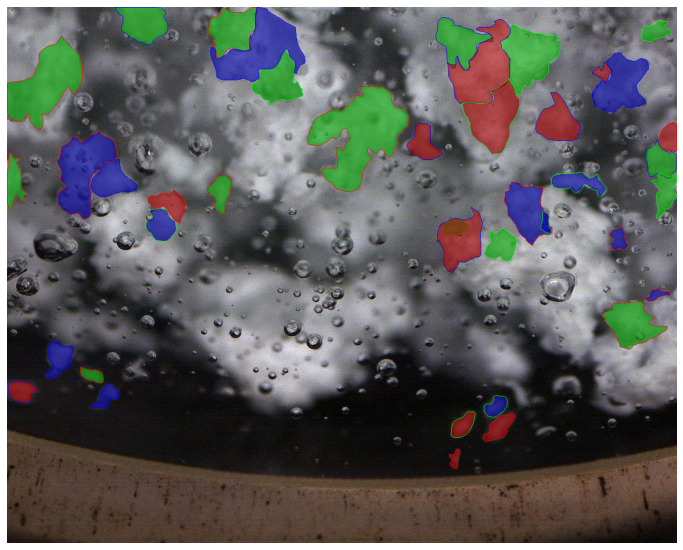

In [ ]:
masked_image = draw_segment(image_array, ann_seg_list, color_list, alpha=0.6)
plt.figure(figsize=(12, 14))
plt.imshow(masked_image)
plt.axis('off')